In [1]:
from scipy.integrate import solve_ivp
import numpy as np

IPython console for SymPy 1.12 (Python 3.12.0-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/

IPython console for SymPy 1.12 (Python 3.12.0-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/



<>:5: SyntaxWarning: invalid escape sequence '\,'
/var/folders/rv/30_ngz5x5l5djjdvflk_6wwm0000gn/T/ipykernel_4813/1608348942.py:5: SyntaxWarning: invalid escape sequence '\,'
  "f_1 f_2 f_3 f_4 tau lambda varpi varpi_p gamma \\omega_{\\rm{ext}} \\omega_{\\rm{p\,ext}} theta Theta phi"


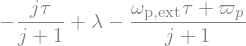

In [2]:
%run "mixed resonance angle derivation.ipynb"

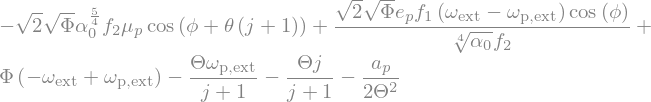

In [3]:
H8_expr

# $\phi+(j+1)\theta$ angle

In [4]:
def rhs_from_H_expr(expr):
    thdot = expr.diff(Th)
    phidot = expr.diff(Phi)
    Thdot = -expr.diff(th)
    Phidot = -expr.diff(phi)
    return lambdify([tau, th, phi, Th, Phi], [thdot, phidot, Thdot, Phidot])

In [6]:
def run_section(params, init_cond):
    H_ang1 = H8_expr

    H_ang1.subs(params)

    rhsfunc = rhs_from_H_expr(H_ang1.subs(params))


    def f(t, Y):
        return rhsfunc(t, *Y)


    canon_init_conds = {
        Th: Th_orbelts.subs(params).subs(init_cond).evalf(),
        Phi: Phi_orbelts.subs(params).subs(init_cond).evalf(),
        th: th_expr.subs(params).subs(init_cond).evalf(),
        phi: atan2(
            *[
                subex.subs(params).subs(init_cond).evalf()
                for subex in tan_phi_orbelts.as_numer_denom()
            ]
        ).evalf(),
    }
    display(canon_init_conds)


    def section_func(t, Y):
        ang = Y[0] % (2 * np.pi)
        if ang > np.pi:
            return ang - 2 * np.pi
        else:
            return ang


    sol = solve_ivp(
        f,
        (0, 100000 * 2 * np.pi),
        [
            canon_init_conds[th],
            canon_init_conds[phi],
            canon_init_conds[Th],
            canon_init_conds[Phi],
        ],
        events=[section_func],
        rtol=1e-12,
        atol=1e-12,
    )

    thangs = sol.y_events[0][:, 0] % (2*np.pi)
    phiangs = sol.y_events[0][:, 1] % (2*np.pi)
    thangs = np.array(thangs, dtype=np.float64)
    phiangs = np.array(phiangs, dtype=np.float64)
    rads = np.array(sol.y_events[0][:, 3], dtype=np.float64)

    return(thangs, phiangs, rads)

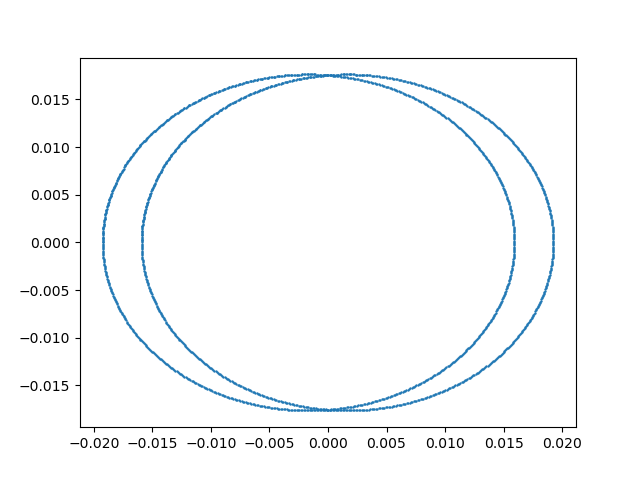

In [13]:
alphajval = (2/3)**(2./3)
ompval = 0
params = {
    om: ompval / alphajval**2,
    om_p: ompval,
    pom_p: 0,
    mu_p: 5e-5,
    e_p: 0.03,
    j: 2,
    a_p: 1,
    f1: f1val_outside,
    f2: f2val_outside,
    alpha0: alphajval,
}

#init_cond = {e: 0.03, pom: np.pi, a: 1 / alphajval * 1.00479, tau: 0, l: 0}
init_cond = {e: 0.001, pom: np.pi, a: 1 / alphajval * 1.01, tau: 0, l: 0}
#init_cond = {e: 0.001, pom: np.pi, a: 1 / alphajval * 1., tau: 0, l: 0}

thangs, phiangs, rads = run_section(params, init_cond)

fig, ax = plt.subplots()
#ax.scatter(np.sqrt(rads) * np.cos(phiangs+333*thangs), np.sqrt(rads) * np.sin(phiangs+3*thangs), s=0.5)
ax.scatter(np.sqrt(rads) * np.cos(phiangs), np.sqrt(rads) * np.sin(phiangs), s=0.5)

In [23]:
ompval = 1e-4

init_cond = {e: 0.001, pom: 0, a: 1 / alpha0val, tau: 0, l: -np.pi/3}
thdict, phidict, raddict = {}, {}, {}
N = 5
alphafracs = np.ones(N) - 0.001 * np.arange(N)

for alphafrac in alphafracs:
    params = {
        om: ompval / alpha0val**2,
        om_p: ompval,
        pom_p: 0,
        mu_p: 5e-5,
        e_p: 0.03,
        j: 2,
        a_p: 1 * alphafrac,
        f1: f1val_outside,
        f2: f2val_outside,
        alpha0: alpha0val,
    }

    thdict[alphafrac], phidict[alphafrac], raddict[alphafrac] = run_section(params, init_cond)

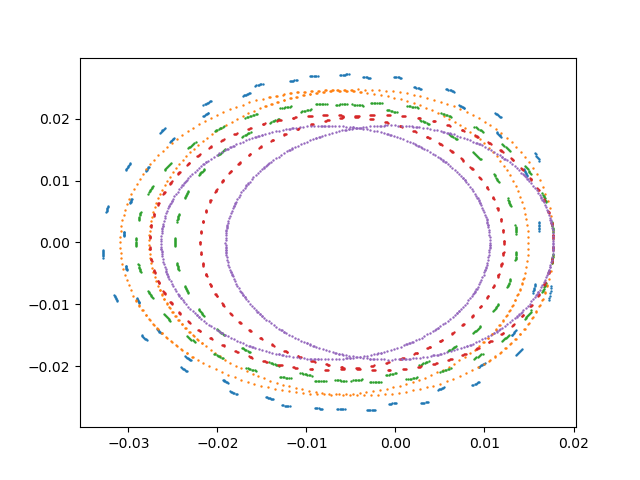

In [24]:
fig, ax = plt.subplots()

for alphafrac in alphafracs:
    ax.scatter(
        np.sqrt(raddict[alphafrac]) * np.cos(phidict[alphafrac]+3*thdict[alphafrac]),
        np.sqrt(raddict[alphafrac]) * np.sin(phidict[alphafrac]+3*thdict[alphafrac]),
        s=0.5,
    )

In [ ]:
fig

## Increasing $a_p$

In [25]:
def rhs_from_H_expr(expr):
    thdot = expr.diff(Th)
    phidot = expr.diff(Phi)
    Thdot = -expr.diff(th)
    Phidot = -expr.diff(phi)
    return lambdify([tau, a_p, th, phi, Th, Phi], [thdot, phidot, Thdot, Phidot])

In [36]:
def run_section(params, init_cond, apfunc):
    H_ang1 = H8_expr

    H_ang1.subs(params)

    rhsfunc = rhs_from_H_expr(H_ang1.subs(params))

    def f(t, Y):
        return rhsfunc(t, apfunc(t), *Y)


    canon_init_conds = {
        Th: Th_orbelts.subs(params).subs(init_cond).evalf(),
        Phi: Phi_orbelts.subs(params).subs(init_cond).evalf(),
        th: th_expr.subs(params).subs(init_cond).evalf(),
        phi: atan2(
            *[
                subex.subs(params).subs(init_cond).evalf()
                for subex in tan_phi_orbelts.as_numer_denom()
            ]
        ).evalf(),
    }
    display(canon_init_conds)


    def section_func(t, Y):
        ang = Y[0] % (2 * np.pi)
        if ang > np.pi:
            return ang - 2 * np.pi
        else:
            return ang


    sol = solve_ivp(
        f,
        (0, 100000 * 2 * np.pi),
        [
            canon_init_conds[th],
            canon_init_conds[phi],
            canon_init_conds[Th],
            canon_init_conds[Phi],
        ],
        events=[section_func],
        rtol=1e-12,
        atol=1e-12,
    )

    thangs = sol.y_events[0][:, 0] % (2*np.pi)
    phiangs = sol.y_events[0][:, 1] % (2*np.pi)
    thangs = np.array(thangs, dtype=np.float64)
    phiangs = np.array(phiangs, dtype=np.float64)
    rads = np.array(sol.y_events[0][:, 3], dtype=np.float64)

    return(thangs, phiangs, rads, sol.t_events)

In [34]:
50000/1e6

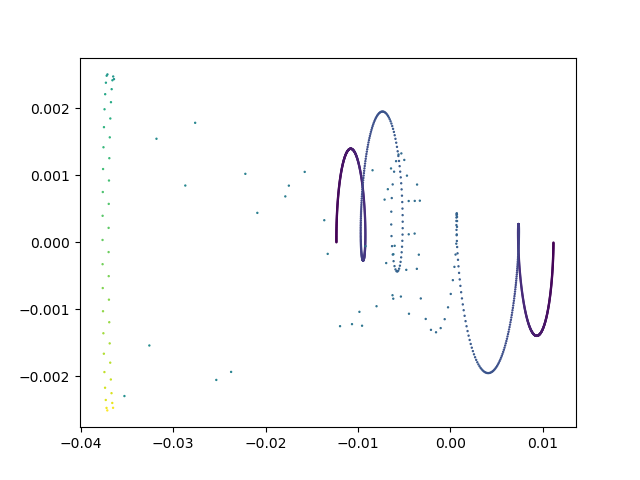

In [60]:
ompval = 5e-5
params = {
    om: ompval / alpha0val**2,
    om_p: ompval,
    pom_p: 0,
    mu_p: 5e-5,
    e_p: 0.02,
    j: 2,
    f1: f1val_outside,
    f2: f2val_outside,
    alpha0: alpha0val,
}

init_cond = {e: 0.0, pom: 0, a: 1 / alpha0val * 1.0, tau: 0, l: 0}

def apfunc(x):
    if x < 50000*2*np.pi:
        return(0.96 + x/(2*np.pi*1e6))
    else:
        return(0.96 + 50000/(1e6))

thangs, phiangs, rads, ts = run_section(params, init_cond, apfunc)

fig, ax = plt.subplots()
ax.scatter(np.sqrt(rads) * np.cos(phiangs+3*thangs), np.sqrt(rads) * np.sin(phiangs+3*thangs), s=0.5, c=ts)
#ax.scatter(np.sqrt(rads) * np.cos(phiangs), np.sqrt(rads) * np.sin(phiangs), s=0.5)

In [59]:
ts = np.linspace(0,2*np.pi*1e5)
aps = np.zeros(len(ts))
for i,ti in enumerate(ts):
    aps[i] = apfunc(ti)
plt.plot(ts,aps)